# Introduction to Algorithms and Fibonacci 

This first Jupyter Notebook will serve as an introduction to algorithms, and will save Miles time from discussing it in class.  Hopefully this first notebook will be review for most of you, but it is a great problem to use as a refresher and introduction to the course and of what is to come.  First, let's clearly define the problem we want to solve.

**Print the nth fibonacci number.**

We can define the nth fibonacci number using the following recurrence relation:

$$f_0 = 0,  f_1 = 1, ~~~~~ f_n = f_{n-1} + f_{n-2} ~~ \text{for all }~~n\geq 2$$

Please note that the lecture slides may use a slightly altered definition, which starts at n = 1 instead of n = 2.  However, both definitions will lead to the same results for $n \geq 2$, so there should be no issue! This recursive definition gives us a good idea to writing a solution.  We can simply use recursion.

In [ ]:
def nth_fibonacci(n):
    if n == 0: return 0;
    if n == 1: return 1;
    return nth_fibonacci(n-1) + nth_fibonacci(n-2)

Run the code for n = 10, 20, 30, and 35

In [ ]:
nth_fibonacci(10)

In [ ]:
nth_fibonacci(20)

In [ ]:
nth_fibonacci(30)

Now let's time the algorithm. Your computer may be faster or slower than mine so we will be interested in how the time *scales* as the input increases rather than the actual number of seconds elapsed.

In [ ]:
import time

In [ ]:
def time_elapsed(n):
    t0 = time.process_time()
    print(nth_fibonacci(n))
    t1 = time.process_time() - t0
    print("Time elapsed (in seconds): ", t1)

Measure the time it takes for n = 10, 20, 30. Note that if the process is too quick then it may just show 0.0 seconds.

In [ ]:
time_elapsed(10)

In [ ]:
time_elapsed(20)

In [ ]:
time_elapsed(30)

If you want to get a better approximation, you can run the same process a few times then divide out by the number of times, essentially taking the average.

In [ ]:
def time_elapsed_average(n,m):
    t0 = time.process_time()
    for i in range(m):
        x =nth_fibonacci(n)
    print(x)
    t1 = (time.process_time() - t0)/m
    print("Time elapsed (in seconds): ", t1)

Try different values of m until you get a non-zero answer for when n=10

In [ ]:
time_elapsed_average(10,10)

In [ ]:
time_elapsed_average(20,10)

In [ ]:
time_elapsed_average(30,10)

Now let's plot some results to see how the time scales as input increases. Let's pick a range of values for $n$ (say, 30 to 40) We will time each one and plot the points on a graph. (It may take a few minutes)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_values = []
y_values = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(30,41): #if you want to iterate from 30 to 40 inclusive, you must include 41
    x_values = x_values + [i] # this appends i to the end of the x_values array
    t0 = time.process_time()
    nth_fibonacci(i)
    t1 = time.process_time() - t0
    y_values = y_values + [t1] #this appends the amount of time to the end of the y_values array

In [ ]:
plt.plot(x_values,y_values)
plt.xlabel('size of input')
plt.ylabel("time taken")
plt.title("Fibonacci algorithm time analysis")
plt.show()

Notice how the time it took to run the code seemed to take exponentially longer as we increased n. If you want to read more about the time complexity, you can view it here https://www.geeksforgeeks.org/time-complexity-recursive-fibonacci-program/

From the graph above, there is good evidence that the time taken by the function ```nth_fibonacci``` scales exponentially as input increases. To get a better idea about the base of the exponential, we can plot the same points on a linear-log scale meaning that you take the natural log of all y values and plot them against the original x values.:

In [ ]:
import numpy as np

In [ ]:
log_y_values = [np.log(y) for y in y_values]  #this takes the natural log of each value in y_values
plt.plot(x_values,log_y_values)
plt.xlabel('size of input')
plt.ylabel("time taken (log)")
plt.title("Fibonacci algorithm time analysis (linear-log)")
plt.show()

Notice now that this looks like a straight line. It is always the case that if you plot an exponential function on a linear-log graph, then the result will be a straight line. Furthermore, if $m$ is the slope of the line. Then $e^m$ will be the base of the exponential. What seems to be the slope of the line in your graph? What does this mean about the base of the exponential of the original graph? Can you find any explanation for this particular number?

## **Exercise 1** 
estimate the slope and enter it into the corresponding gradescope question

## **Exercise 2** 
using the slope, estimate the base of the exponential of the original plot and enter it into the corresponding gradescope question.

You've probably already seen an algorithm for the fibonacci problem that scales linearly.  Before we consider it, let's first look at a recursive tree for our algorithm with n = 5, which is taken from our lecture slides.

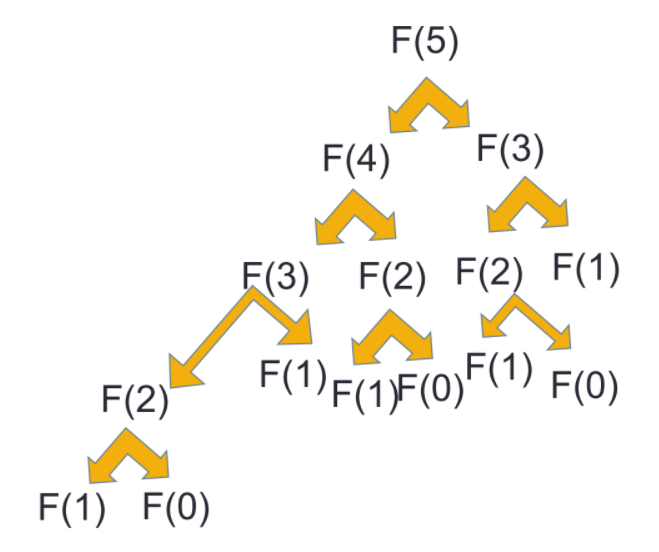

Do you notice anything inefficient in our recursive algorithm based| on the drawing? Take some time to decide for yourself, and then move on.

# Algorithm 2
Hopefully you noticed that we are repeating unneccessary calls in our recursive tree.  For example, $f_1$ was recursively called 5 times!

Now, if we had a way to store this information each time, then we wouldn't need to continually recalculate, which would in turn produce a much faster algorithm here.  This concept will be talked about much more in class with dynamic programming!

In [ ]:
import array

def nth_fibonacci_2(n):
    if (n == 0 or n == 1):
        return n;
    fib = [0] * (n+1)
    fib[0] = 0
    fib[1] = 1
    for i in range(2,n+1):
        fib[i] = float(fib[i-1]) + float(fib[i-2])
    return fib[n];

Play around with the plotting!

In [ ]:
x_values_2 = []
y_values_2 = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(30,41): #this loops through all inputs between 30 and 40 inclusive.  
    t0 = time.process_time()
    nth_fibonacci_2(i)
    t1 = time.process_time() - t0
    x_values_2 = x_values_2 + [i] # this appends i to the end of the x_values array
    y_values_2 = y_values_2 + [t1] #this appends the amount of time to the end of the y_values array

In [ ]:
plt.plot(x_values_2,y_values_2)
plt.xlabel('size of input')
plt.ylabel("time taken")
plt.title("Fibonacci 2 algorithm time analysis")
plt.show()

If your computer is fast enough, then you may have a horizontal line at 0. This means that your algorithm is too fast and the amount of time it took for the process to complete was not detectable. What we are going to do is run the algorithm for much bigger inputs so that it will take longer. (it may take a few minutes)

In [ ]:
x_values_2 = []
y_values_2 = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(1,11): #this loops through all inputs between 1 and 10 inclusive. Then we will multiply i by 10000 to iterate through the inputs 10000, 20000, ...  
    t0 = time.process_time()
    for m in range(20):        #run the same process 20 times then divide by 20 to get the average time.
        x =nth_fibonacci_2(i*10000)
    t1 = (time.process_time() - t0)/20
    
    x_values_2 = x_values_2 + [i*10000] # this appends i to the end of the x_values array
    y_values_2 = y_values_2 + [t1] #this appends the amount of time to the end of the y_values array

In [ ]:
plt.plot(x_values_2,y_values_2)
plt.xlabel('size of input')
plt.ylabel("time taken")
plt.title("Fibonacci 2 algorithm time analysis")
plt.show()

Your graph should look almost straight here. That is because the algorithm is a linear time algorithm! (See if you can analyze the runtime of nth_fibonacci_2 yourself.)

# Algorithm 3
This next algorithm is a bit more subtle, but ends up using less memory than Algorithm 2.  See if you notice anything we don't use in Algorithm 2. (Hint: Do we *really* need to store every previous fibonacci number, or can we get away with less?)

When you have your answer, read through the algorithm and see if your idea was used!

In [ ]:
def nth_fibonacci_3(n):
    if n == 1 or n == 2:
        return n-1;
    prev2=0
    prev1=1
    for i in range(n-2):
        tmp = float(prev1) + float(prev2)
        prev2 = prev1
        prev1 = tmp
    return prev1;

We now have a constant space complexity rather than a linear one by recognizing that we only need to store the previous 2 fibonacci numbers at each step!

# Challenge

Design an algorithm for the following problem: 

You are climbing a ladder.  At each rung i, you can either climb to the (i+1)th rung, stretch up to the (i+2)nd rung, or stretch further up to the (i+3)rd rung.  How many unique ways can you climb to the nth rung of the ladder?

Notes: To test your code against our test cases, fill in the designated spots, and then run sequentially through the tests.  If you made a mistake, please rerun your function before you do the test cases again.

*Hint: Try to modify Algorithm 3 to the needs of this question.  In order to pass the test cases, you should not use floats!*

In [ ]:
def ladder_climb(n):

    # Type Solution here!
    

In [ ]:
if ladder_climb(0)==1:
    print(0, True)
else:
    print(0, False)
if ladder_climb(1)==1:
    print(1, True)
else:
    print(1, False)   
if ladder_climb(2)==2:
    print(2, True)
else:
    print(2, False) 
if ladder_climb(3)==4:
    print(3, True)
else:
    print(3, False)
if ladder_climb(4)==7:
    print(4, True)
else:
    print(4, False) 
if ladder_climb(10)==274:
    print(10, True)
else:
    print(10, False) 
if ladder_climb(33)==334745777:
    print(33, True)
else:
    print(33, False)
if ladder_climb(100)==180396380815100901214157639:
    print(100, True)
else:
    print(100, False)

## Exercise 3:
enter the result of ladder_climb(200).

In [ ]:
x_values = []
y_values = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(30,41): 
    x_values = x_values + [i] # this appends i to the end of the x_values array
    y = ladder_climb(i)
    y_values = y_values + [y] #this appends the amount of time to the end of the y_values array
    


In [ ]:
plt.plot(x_values,y_values)
plt.xlabel('size of input')
plt.ylabel("value of output")
plt.title("Ladder Climb output analysis")
plt.show()

In [ ]:
log_y_values = [np.log(y) for y in y_values]  #this takes the natural log of each value in y_values
plt.plot(x_values,log_y_values)
plt.xlabel('size of input')
plt.ylabel("value of output (log)")
plt.title("Ladderclimb output analysis (linear-log)")
plt.show()

Can you use this linear-log plot to estimate the rate at which the outputs of ladderclimb grow? 

## Exercise 4:
Estimate the rate that the *o ladder_climb(n) grows as a function of n.